<a href="https://colab.research.google.com/github/techshot25/HealthCare/blob/master/HealthCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Personal Datasets

By Ali Shannon

---

This observes the cost of healthcare for a sample of the population given smoking habits, age, sex, bmi, and region. The data will feature observations of statistical informaton and regression analysis of the dataset.

The goal is to find the best estimator of insurance cost and populating the `charges` column. 


### Acknowledgements
Data imported from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Visit their page for publicly available datasets to practice with ML and creating pipelines.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('insurance.csv') # import the CSV as a pandas dataframe

df.head() # show the first five rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# check for missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0] # normalize
print(f'{missing_values *100} %')

Series([], dtype: float64) %


No missing values, we can move on.

In [3]:
from sklearn.preprocessing import LabelEncoder

# convert str values to int using the scikit-learn encoder

st = df.apply(LabelEncoder().fit_transform)

st.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254


Using the converted dataset, we can visualize the correlation heatmap

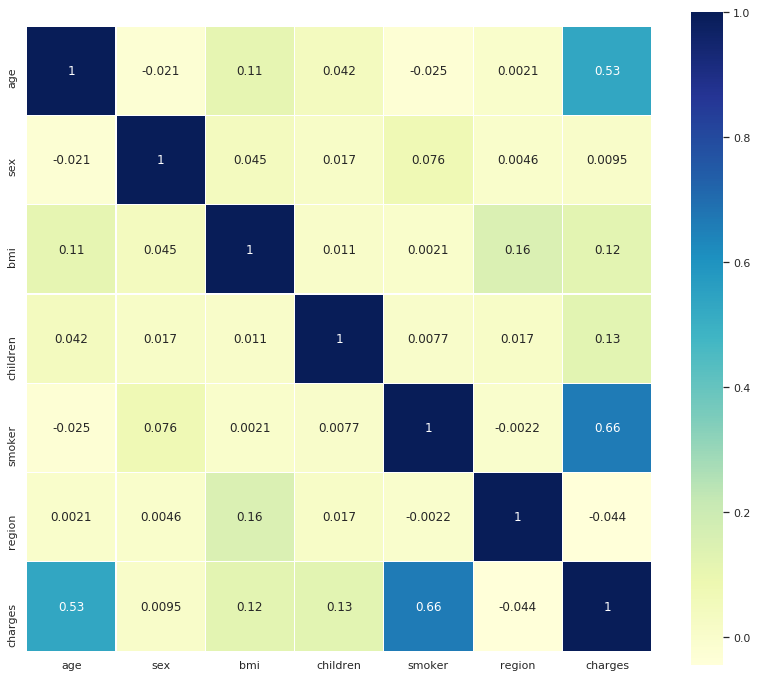

In [4]:
sns.set(color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(st.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu")
plt.show()

Seems like age and smoking weigh the most when looking at the charges row (or column). We expect the weights of these two to be higher than the rest.   

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


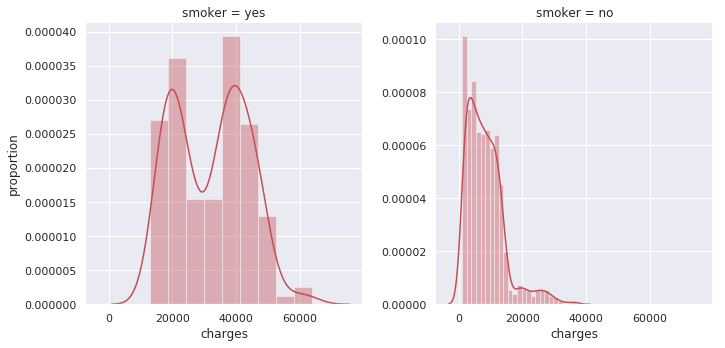

In [5]:
g = sns.FacetGrid(df, col="smoker",  size= 5, sharey=False, sharex = True)
g.map(sns.distplot, "charges", color = 'r');
g.set_axis_labels("charges", "proportion");
g.despine(left=True)

No surprise that smokers pay more for healtcare.

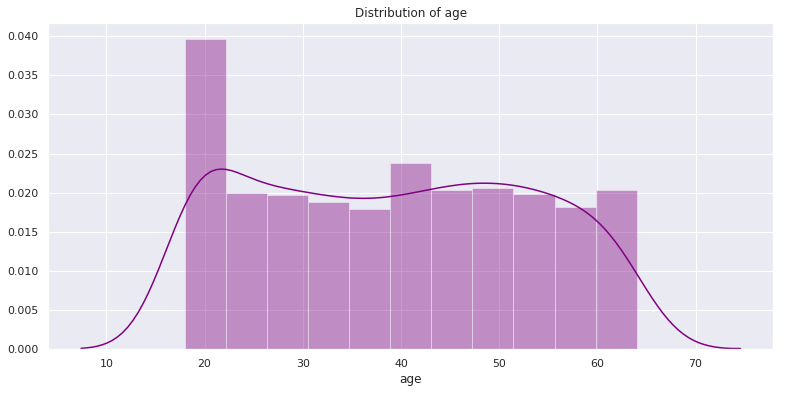

In [6]:
plt.figure(figsize=(13,6))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'purple')

Judging by the party life at UVa, we can see why so many young adults even seek medical care.

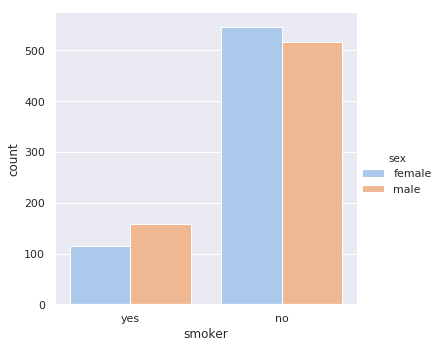

In [7]:
sns.catplot(x="smoker", kind="count", hue = 'sex', data = df , palette='pastel');
plt.show()

Luckily, the majority understands the downsides of smoking.

The data seems pretty balanced with a slight skew towards male. Stop smoking, boys!

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


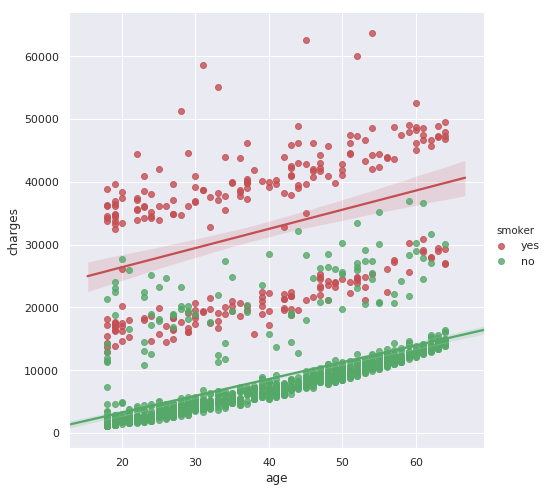

In [8]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette=dict(yes="r", no="g"), size = 7);
ax.set_title('Smokers and non-smokers');
plt.show()

While it seems obvious that the charges increase linearly with age, smoking appears to be the highest contributor to charges.

### Machine Learning

First step is to apply get dummies which works like this: 

The `pandas.get_dummies` converts the vector of values to a boolean matrix of ones and zeros. This will be more useful since our regressor will treat the inputs as numbers instead of integers.

Here is an example of how it works:

$$\left \{ x_{i} \; | \; x_{i} \in \mathbb{Z} \;:\; x_{i} \in [0, 1] \right \}$$

Observe how the dummies matrix is represented:

$$\begin{pmatrix}\text{Medium}\\ \text{High}\\ \text{Low}\\ \vdots  \end{pmatrix}=\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix} \cdot \begin{pmatrix}\text{High}\\ \text{Medium}\\ \text{Low}\\ \vdots  \end{pmatrix}$$

In [9]:
df['age'] = df['age'].astype(float)
df['children'] = df['children'].astype(float)

df = pd.get_dummies(df)

df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,16884.92400,1,0,0,1,0,0,0,1
1,18.0,33.770,1.0,1725.55230,0,1,1,0,0,0,1,0
2,28.0,33.000,3.0,4449.46200,0,1,1,0,0,0,1,0
3,33.0,22.705,0.0,21984.47061,0,1,1,0,0,1,0,0
4,32.0,28.880,0.0,3866.85520,0,1,1,0,0,1,0,0


In [0]:
y = df['charges']
X = df.drop(columns=['charges'])

Since no testing data is provided, we will split the given dataset into training and testing sets.

In [0]:
from sklearn.model_selection import train_test_split


# use 10% of dataset as testing data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


lr = LinearRegression().fit(X_train, y_train)

lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)

print('MSE train data: {:.5}, MSE test data: {}'.format(lr_train_mse, lr_test_mse))

print('rMSE train data: {:.5}, rMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(lr_train_mse)), 
    np.sqrt(np.absolute(lr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,lr_train_pred),
    r2_score(y_test,lr_test_pred)))

MSE train data: 3.6994e+07, MSE test data: 32275850.35093538
rMSE train data: 6082.3, rMSE test data: 6082.3
R2 train data: 0.74915, R2 test data: 0.76604


This isn't too bad for a first try. What happens if we implement polynomial features?

Polynomial features works on exploring the coeffcients of $(x_1+x_2+...+x_n)^k$

For the case of $k=2$ it looks something like this:

$$(x_1+x_2+..+x_n)^2 = a_1 x_1^2+a_2 x_1 x_2 + a_3 x_2^2+..$$

This helps us see the effect of non-linear relationships between features.

In [0]:
from sklearn.preprocessing import PolynomialFeatures

X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.1, random_state=42)

In [14]:
pr = LinearRegression().fit(X_train, y_train)

pr_train_pred = pr.predict(X_train)
pr_test_pred = pr.predict(X_test)

pr_train_mse = mean_squared_error(y_train,pr_train_pred)
pr_test_mse = mean_squared_error(y_test,pr_test_pred)


print('MSE train data: {:.5}, MSE test data: {}'.format(pr_train_mse, pr_test_mse))

print('rMSE train data: {:.5}, rMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(pr_train_mse)), 
    np.sqrt(np.absolute(pr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train,pr_train_pred),
    r2_score(y_test,pr_test_pred)))

MSE train data: 2.2632e+07, MSE test data: 20052020.438064214
rMSE train data: 4757.3, rMSE test data: 4757.3
R2 train data: 0.84654, R2 test data: 0.85465


Splendid! Now we have a better variance score using polynomial relationships.

In [15]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)

rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)


rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)


print('MSE train data: {:.5}, MSE test data: {}'.format(rfr_train_mse, rfr_test_mse))

print('rMSE train data: {:.5}, rMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

MSE train data: 3.4406e+06, MSE test data: 22381678.25994923
rMSE train data: 1854.9, rMSE test data: 1854.9
R2 train data: 0.97667, R2 test data: 0.83776


In [16]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge().fit(X_train, y_train)

br_train_pred = br.predict(X_train)
br_test_pred = br.predict(X_test)


br_train_mse = mean_squared_error(y_train, br_train_pred)
br_test_mse = mean_squared_error(y_test, br_test_pred)


print('MSE train data: {:.5}, MSE test data: {}'.format(br_train_mse, br_test_mse))

print('rMSE train data: {:.5}, rMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(br_train_mse)), 
    np.sqrt(np.absolute(br_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, br_train_pred),
    r2_score(y_test, br_test_pred)))

MSE train data: 2.453e+07, MSE test data: 20243949.805891838
rMSE train data: 4952.8, rMSE test data: 4952.8
R2 train data: 0.83366, R2 test data: 0.85326


This is a decent prediction, we can safely assume that the Random Forest wins with a variance score of 97% against training data, and 84% against data it has never seen before. It also has the lowest mean MSE value.